In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## SKLearn

(почти) каждый класс в SKLearn имеет следующие методы:

In [8]:
class KNN():
    def __init__(self, n_neighbors=5, p=2, metric='minkowski'):
        <your code>
    
    def fit(self, X_train, y_train):
        <your code>
        
    def predict(self, X_test):
        <your code>
        
    def predict_proba(self, X_test):
        <your code>

(у регрессий нет predict_proba, есть только predict)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

my_knn = KNN(k=<choose your favourite>)
sklearn_knn = KNeighborsClassifier(k=<choose your favourite>)

## House pricing

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [11]:
train_data = pd.read_csv("train_housing.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
Y_train = train_data[['SalePrice']]
X_train = train_data.drop("SalePrice", axis=1)

### Feature Processing

In [13]:
# def cat_to_numbers(data, columns):
#     """
#     turn categorical features into numerical
    
#     data: pd.csv dataset
#     columns: list of cstegorical columns to process
#     """
#     numerical_data = deepcopy(data)
#     for column in columns:
#         numerical_column = []
#         numerical_dict = {}
#         for item in data[column]:
#             if item not in numerical_dict:
#                 numerical_dict[item] = len(numerical_dict)
#             numerical_column.append(numerical_dict[item])
#         numerical_data[column] = numerical_column
#     return numerical_data

def binarize(data, columns):
    """
    binarize feature
    
    data: pd.csv dataset
    columns: list of cstegorical columns to process
    """
    binarized_data = deepcopy(data)
    for column in columns:
        unique_items = set(data[column])
        for unique_item in unique_items:
            new_column = []
            for item in data[column]:
                new_column.append(int(item==unique_item))
            binarized_data[column+'_'+unique_item] = new_column
        binarized_data.drop(column, axis=1, inplace=True)
    return binarized_data

In [14]:
cat_features = [i[0] for i in dict(X_train.dtypes).items() if 'obj' in str(i[1])]
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
from sklearn.preprocessing import LabelEncoder
for c in cat_features:
    X_train[c] = LabelEncoder().fit_transform(X_train[c].fillna('_'))
X_train = X_train.fillna(0)

### Linear Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [86]:
lr = LinearRegression()
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

cross_val_score(lr, X_train_sc, Y_train, scoring='neg_mean_squared_error') 

array([-8.54436142e+08, -1.23128559e+09, -1.69712369e+09])

Посмотрим, какие коэффициенты получились у линейной регрессии:

In [87]:
lr.fit(X_train, Y_train)
lr.coef_

array([[-1.73744266e+00, -1.06499350e+02, -1.28936153e+03,
        -4.02200227e+01,  3.93807636e-01,  3.21784944e+04,
         4.23062647e+03, -6.71060959e+02,  3.19672375e+03,
        -5.54202135e+04,  3.25140345e+02,  5.18408152e+03,
         3.96028779e+02, -8.10184004e+02, -9.04182195e+03,
        -1.94895516e+03, -1.19329838e+03,  1.08601204e+04,
         5.44079264e+03,  1.93286702e+02, -1.03918931e+00,
         1.87052215e+03,  5.33437659e+03, -1.09535070e+03,
         4.37130549e+02,  4.66197360e+03,  3.25911965e+01,
        -9.42004286e+03,  7.43362463e+02,  1.37039378e+03,
        -7.82762915e+03,  2.26549064e+03, -3.51309663e+03,
        -6.31567861e+02,  2.69761198e+00,  1.27862214e+03,
         6.76522486e+00, -5.36570033e+00,  4.09713653e+00,
        -1.94372003e+03, -7.70207498e+02, -2.24166054e+02,
        -5.90563574e+02,  2.57574933e+01,  2.12878753e+01,
        -2.50625696e+01,  2.19827990e+01,  6.58252815e+03,
        -3.55184353e+02,  3.36167638e+03, -2.92320442e+0

Посмотрим также на корреляцию признаков:

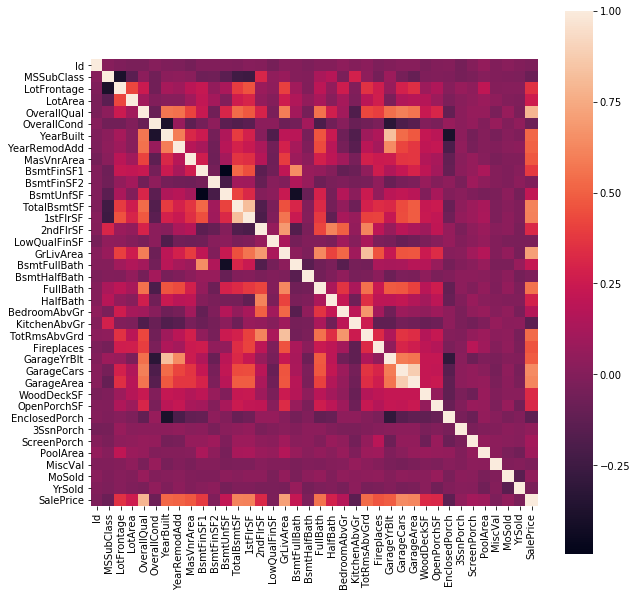

In [88]:
plt.subplots(figsize=(10,10))
# encoded_data, encoders = number_encode_features(df)
sns.heatmap(train_data.corr(), square=True)
plt.show()


## Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

In [404]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [405]:
X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [378]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf, X_train, Y_train, scoring='accuracy') 

array([0.50471415, 0.72310791, 0.5819904 ])

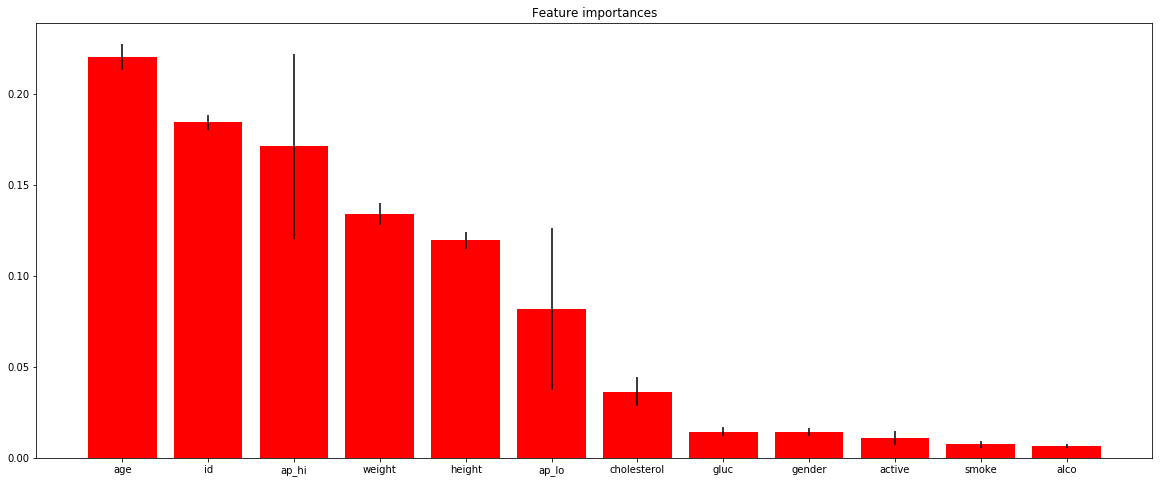

In [388]:
#rf.fit(X_train, Y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), train_data.drop("cardio", axis=1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [390]:
from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(n_estimators=100)
params = {
    'n_estimators': [50, 100, 500]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [391]:
print(gsv.best_params_, gsv.best_score_)

{'n_estimators': 500} 0.6105857142857143


#### XGBoost

In [ ]:
<do the same for GradientBoostingClassifier and other eatimators> 

### Model Ensembles

Мы можем предсказывать не класс, а вероятности классов:

In [412]:
train_data = pd.read_csv("train_med.csv", delimiter=';')

X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=37)

In [417]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
pred = rf.predict_proba(X_test)

In [420]:
pred

array([[0.25, 0.75],
       [0.32, 0.68],
       [0.68, 0.32],
       ...,
       [0.12, 0.88],
       [0.42, 0.58],
       [0.2 , 0.8 ]])

In [1]:
estimator1 = <choose your favourite>
estimator2 = <choose your second favourite>

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)

pred1 = estimator1.predict_proba(X_test)[:, 1]
pred2 = estimator2.predict_proba(X_test)[:, 1]

pred = <compute average of all the estimators>